# **Linear Regression - Practical Implementation**

In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# loading dataset
df = pd.read_csv('/content/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
# independent feature
X = df.drop('MEDV', axis=1)
y = df[['MEDV']]

## **Train Test Split**

In [17]:
# importing train test split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

## **Standardizing**

In [22]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

In [23]:
# standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Implementing Linear Regression**

In [24]:
# importing linear regression
from sklearn.linear_model import LinearRegression

# importing cross validation
from sklearn.model_selection import cross_val_score

**Training**

In [30]:
regression = LinearRegression()
regression.fit(X_train, y_train)
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [31]:
np.mean(mse)

-24.812046414606545

**Test**

In [33]:
reg_predict = regression.predict(X_test)
reg_predict

array([[29.21529199],
       [36.30339776],
       [14.03128563],
       [24.76168914],
       [18.72223064],
       [23.16958331],
       [17.64797489],
       [13.60904521],
       [23.34935496],
       [20.56830372],
       [25.17282933],
       [18.91312996],
       [-5.26398345],
       [21.44198336],
       [19.62038241],
       [25.79217239],
       [20.77719807],
       [ 6.29686111],
       [40.6340078 ],
       [17.59594196],
       [27.24372529],
       [30.35208929],
       [11.40534258],
       [23.64894714],
       [18.2476576 ],
       [16.60091802],
       [22.66612042],
       [15.06050356],
       [22.65507014],
       [19.20726672]])

In [34]:
# importing seaborn
import seaborn as sns

<ipython-input-35-02d11f538eb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict - y_test)


<Axes: ylabel='Density'>

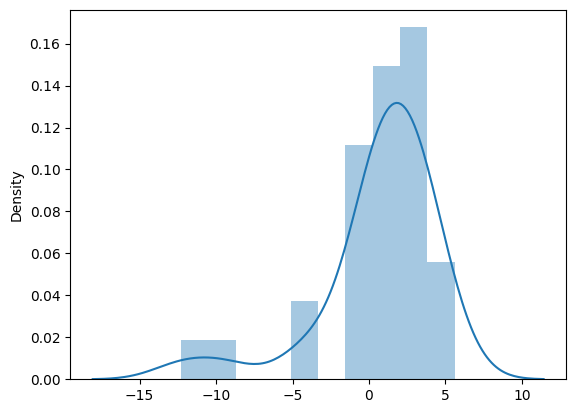

In [35]:
sns.distplot(reg_predict - y_test)

In [36]:
# importing metrics
from sklearn.metrics import r2_score

In [37]:
r2_score(reg_predict, y_test)

0.7907222449615623